A segunda fase é implementar uma função de recorte (CLIP) e GeoTiff utilizando o limite espacial de um arquivo vetorial como camada base.

In [1]:
import rasterio
import numpy as np
import fiona

from matplotlib import pyplot
import rasterio.mask
from os import path



In [2]:
# Input será a imagem gerada na etapa anterior
DATA_FOLDER = 'data'
INPUT_FOLDER = 'step_1'
OUTPUT_FOLDER = 'step_2'
IMAGE_NAME = '20180113_130423_103a.tif'

input_file = path.join(DATA_FOLDER, INPUT_FOLDER, IMAGE_NAME)
src = rasterio.open(input_file)

In [3]:
band_ndvi = src.read(1)
band_ndvi.shape

(765, 727)

In [4]:
band_ndvi

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

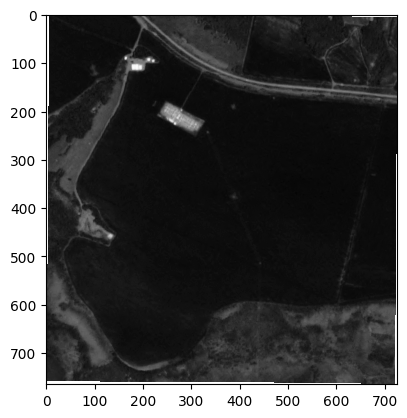

In [5]:
pyplot.imshow(band_ndvi, cmap='Greys')
pyplot.show()

In [6]:
# Usaremos Fiona para utilizar as informações do GeoJSON
geo_name = 'gleba01.geojson'
geo_file = path.join(DATA_FOLDER, geo_name)

colxn = fiona.open(geo_file, "r", driver="GeoJSON")

colxn

<open Collection 'data\gleba01.geojson:gleba01', mode 'r' at 0x26d7a5f8820>

In [7]:

with fiona.open(geo_file, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

shapes

In [8]:
with rasterio.open(input_file) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

In [9]:
output_file = path.join(DATA_FOLDER, OUTPUT_FOLDER, IMAGE_NAME)

with rasterio.open(output_file, "w", **out_meta) as dest:
    dest.write(out_image)

In [10]:
out = rasterio.open(output_file)
array = out.read(1)
array.shape

(693, 654)

In [11]:
array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

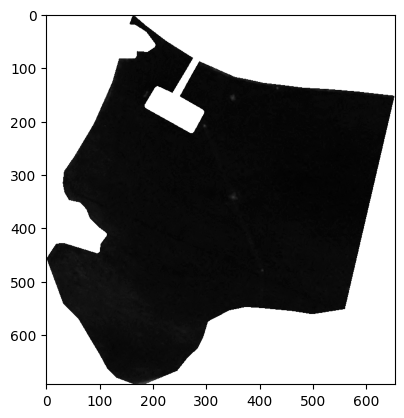

In [12]:
pyplot.imshow(array, cmap='Greys')
pyplot.show()

In [13]:
np.average(array)

0.53494954